Importing Necessary Modules

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np



Loading the Datasets

In [2]:
test_set = pd.read_csv('imageRecognition/mnist_test.csv', index_col=None)
train_set = pd.read_csv('imageRecognition/mnist_train.csv', index_col=None) 

Familiarizing with the Datasets

In [24]:
print(test_set)

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

In [25]:
print(train_set)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

Spliting Images and Labels in Train and Test Sets

In [3]:
train_x = np.log1p(np.log1p(train_set.drop('label' , axis = 1)))
test_x = np.log1p(np.log1p(test_set.drop('label' , axis = 1)))
train_y = train_set['label']
test_y = test_set['label']

Visualization of Images with Labels

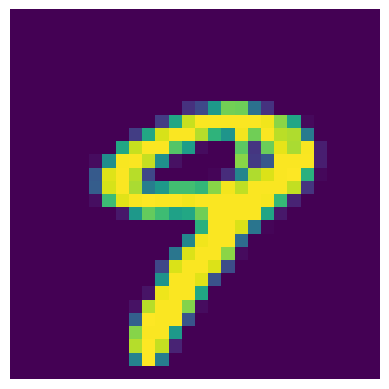

9


In [27]:
image_pixel_values = test_set.iloc[9, 1:] 

# Reshape the pixel values into a 28x28 array
image_array = image_pixel_values.values.reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(test_set.iloc[9,0])

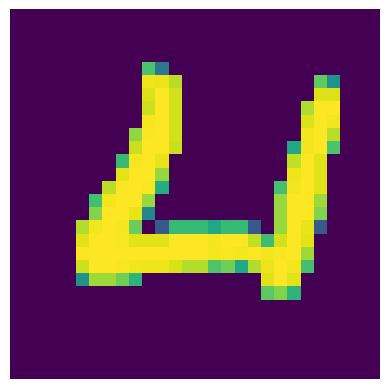

4


In [28]:
# Extract the pixel values for the chosen image
image_pixel_values = test_x.iloc[33,:] # Columns 1 to end contain pixel values

# Reshape the pixel values into a 28x28 array
image_array = np.array(image_pixel_values).reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array)  
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(test_y[33])

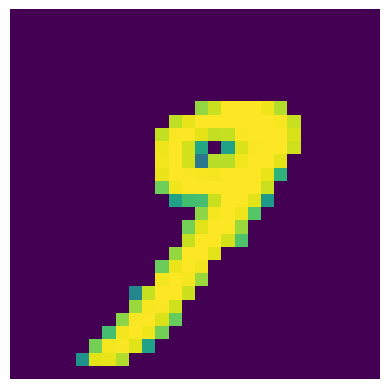

9


In [29]:
# Extract the pixel values for the chosen image
image_pixel_values = train_x.iloc[33,:] # Columns 1 to end contain pixel values

# Reshape the pixel values into a 28x28 array
image_array = np.array(image_pixel_values).reshape(28, 28)

# Display the image using plt.imread
plt.imshow(image_array) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(train_y[33])

Skewness Detection and Solution

Initial Skewness: 2.151104099863994
Transformed Skewness: 1.622158987903982


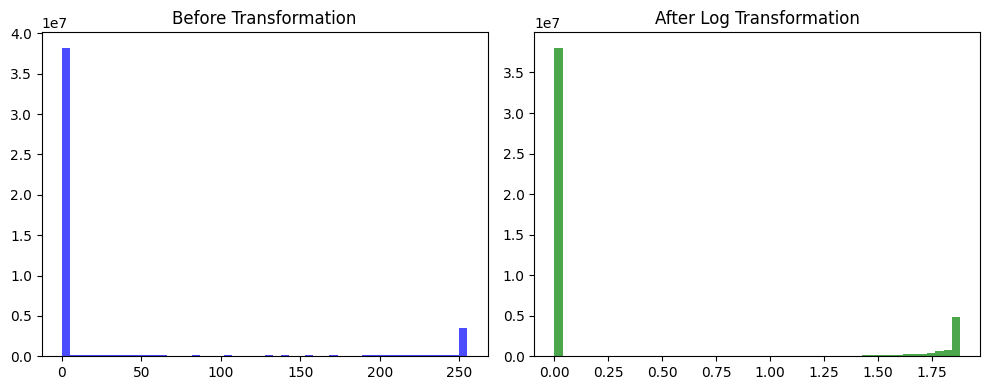

In [30]:
from scipy.stats import skew
all_pixel_values_train = np.expm1(np.expm1(np.array(train_x))).flatten()

# Calculate skewness before transformation
initial_skewness_train = skew(all_pixel_values_train)
print(f"Initial Skewness: {initial_skewness_train}")

# Apply logarithm transformation
transformed_pixel_values_train = np.array(train_x).flatten()

# Calculate skewness after transformation
transformed_skewness_train = skew(transformed_pixel_values_train)
print(f"Transformed Skewness: {transformed_skewness_train}")

# Plot histograms before and after transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_pixel_values_train, bins=50, color='blue', alpha=0.7)
plt.title('Before Transformation')
plt.subplot(1, 2, 2)
plt.hist(transformed_pixel_values_train, bins=50, color='green', alpha=0.7)
plt.title('After Log Transformation')
plt.tight_layout()
plt.show()

Initial Skewness: 2.1285586190159993
Transformed Skewness: 1.60915589250484


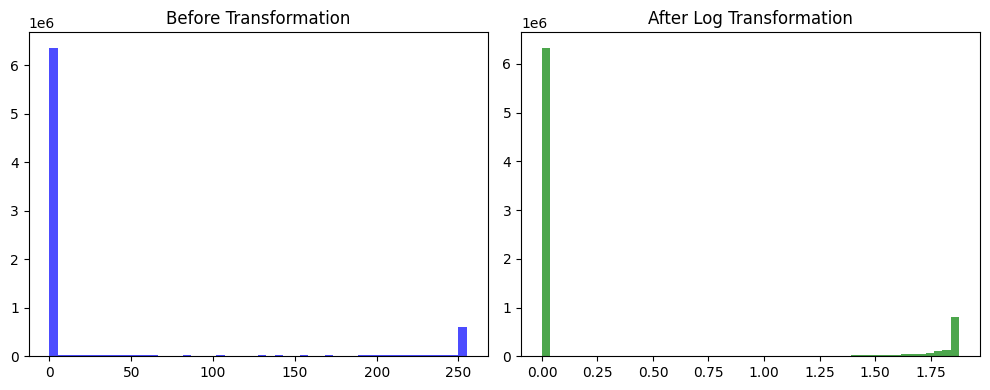

In [31]:
all_pixel_values_test = np.expm1(np.expm1(np.array(test_x))).flatten()

# Calculate skewness before transformation
initial_skewness_test = skew(all_pixel_values_test)
print(f"Initial Skewness: {initial_skewness_test}")

# Apply logarithm transformation
transformed_pixel_values_test = np.array(test_x).flatten()

# Calculate skewness after transformation
transformed_skewness_test = skew(transformed_pixel_values_test)
print(f"Transformed Skewness: {transformed_skewness_test}")

# Plot histograms before and after transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_pixel_values_test, bins=50, color='blue', alpha=0.7)
plt.title('Before Transformation')
plt.subplot(1, 2, 2)
plt.hist(transformed_pixel_values_test, bins=50, color='green', alpha=0.7)
plt.title('After Log Transformation')
plt.tight_layout()
plt.show()

Train the Model (Tree Ensemble)

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(train_x, train_y)




RandomForestClassifier(random_state=42)

Predict and Calculate Model Accuracy (Tree Ensemble)


In [33]:
from sklearn.metrics import accuracy_score

y_predict = clf.predict(test_x)


accuracy = accuracy_score(test_y, y_predict) * 100

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 96.97


Save the Model

In [10]:
import joblib

joblib.dump(clf, 'models/TreeEnsemble.pkl')

['models/TreeEnsemble.pkl']

C:\Users\ammar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


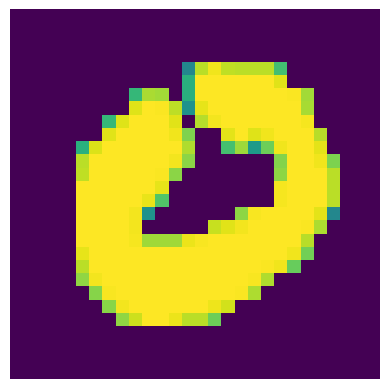

Real Label : 0
Predicted Label : 0


In [34]:
image = test_x.iloc[25,:]
real_label = test_y.iloc[25]


# Reshape the pixel values into a 28x28 array
image_array = np.array(image).reshape(28, 28)

pred_label = clf.predict(image.values.reshape(1, -1))
# Display the image using plt.imread
plt.imshow(image_array) 
plt.axis('off')  # Turn off axis labels and ticks
plt.show()
print(f"Real Label : {real_label}")
print(f"Predicted Label : {pred_label[0]}")

Train the Model (Neural Network)

In [5]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Reshape the image data to include the channel dimension
# train_x_reshaped = train_x.values.reshape(-1, 28, 28, 1)
# test_x_reshaped = test_x.values.reshape(-1, 28, 28, 1)

# # Build the model
# model = models.Sequential()
# model.add(layers.Input(shape=(28, 28, 1)))  # Input shape includes channel dimension

# # Add convolutional layers
# model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# # Flatten the output of the last convolutional layer
# model.add(layers.Flatten())

# # Add fully connected layers
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits 0-9

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(train_x_reshaped, train_y, epochs=10, batch_size=64, validation_data=(test_x_reshaped, test_y))

# # Evaluate the model
# test_loss, test_acc = model.evaluate(test_x_reshaped, test_y)
# print(f"Test accuracy: {test_acc:.2f}")


Epoch 1/10
938/938 [==============================] - 68s 71ms/step - loss: 0.1650 - accuracy: 0.9500 - val_loss: 0.0631 - val_accuracy: 0.9795
Epoch 2/10
938/938 [==============================] - 65s 69ms/step - loss: 0.0543 - accuracy: 0.9835 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 3/10
938/938 [==============================] - 70s 75ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0369 - val_accuracy: 0.9889
Epoch 4/10
938/938 [==============================] - 67s 72ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 68s 72ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0419 - val_accuracy: 0.9871
Epoch 6/10
938/938 [==============================] - 76s 81ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0441 - val_accuracy: 0.9865
Epoch 7/10
938/938 [==============================] - 81s 86ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0323 - val_accuracy:

Save the model

In [7]:
#model.save('models/CNN.h5')

Use the Model

In [16]:
from tensorflow.keras.models import load_model
import joblib

model = load_model('models/CNN.h5')
clf = joblib.load('models/TreeEnsemble.pkl')

image = test_x.iloc[25,:]
real_label = test_y.iloc[25]

pred_label_clf = clf.predict(image.values.reshape(1, -1))
pred_label_model = model.predict(image.values.reshape(-1, 28, 28, 1))

print(f"Real Label: {real_label}")
print(f"Label Predicted by Tree Ensemble: {pred_label_clf[0]}")
print(f"Label Predicted by CNN: {np.argmax(pred_label_model)}")


C:\Users\ammar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 323ms/step
Real Label: 0
Label Predicted by Tree Ensemble: 0
Label Predicted by CNN: 0
